# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
from skimage.morphology import disk,square, rectangle, star, diamond
from skimage.filters import rank
import cv2


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

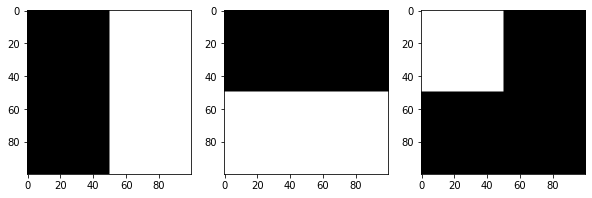

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


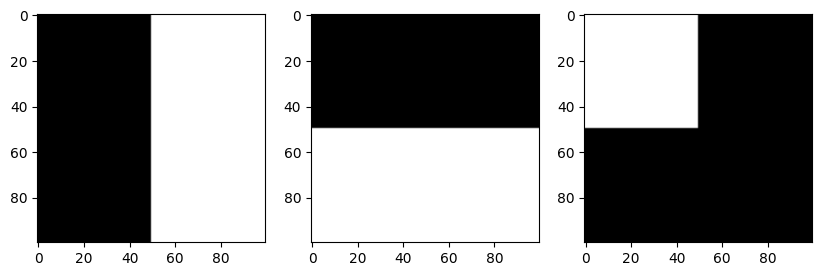

In [2]:
img1 = np.ones((100, 100))  
img1[:, :50] = 0  

img2 = np.ones((100, 100))  
img2[:50, :] = 0  

img3 = np.zeros((100, 100)) 
img3[:50, :50] = 1  

fig, axes = plt.subplots(1, 3, figsize=(10, 8)) 

axes[0].imshow(img1, cmap='gray')
axes[1].imshow(img2, cmap='gray')
axes[2].imshow(img3, cmap='gray')
plt.show()


*   Use the above three images to create the following image

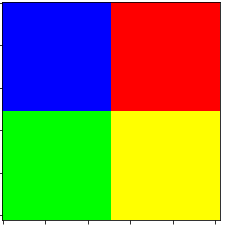
*Hint: Remember channels and color spaces*

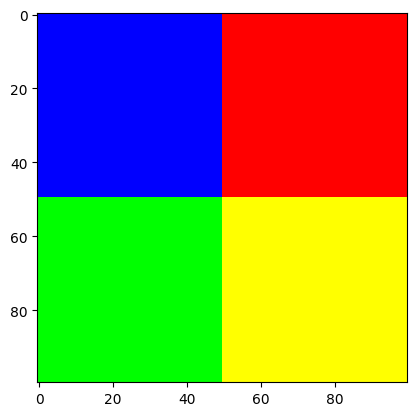

In [3]:
img = np.zeros((100,100,3 ),dtype=np.uint8)

img[:50,:50] = [0,0,255]
img[50:,:50] = [0,255,0]
img[:50,50:] = [255,0,0]
img[50:,50:] = [255,255,0]

plt.imshow(img)
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

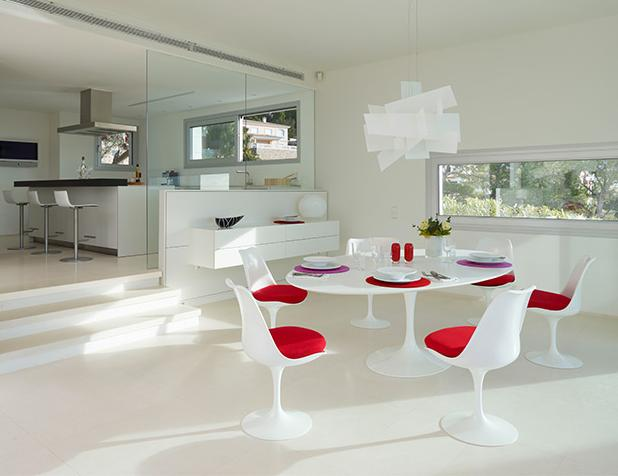

*   Extract individual channels and plot them using matplotlib subplot.



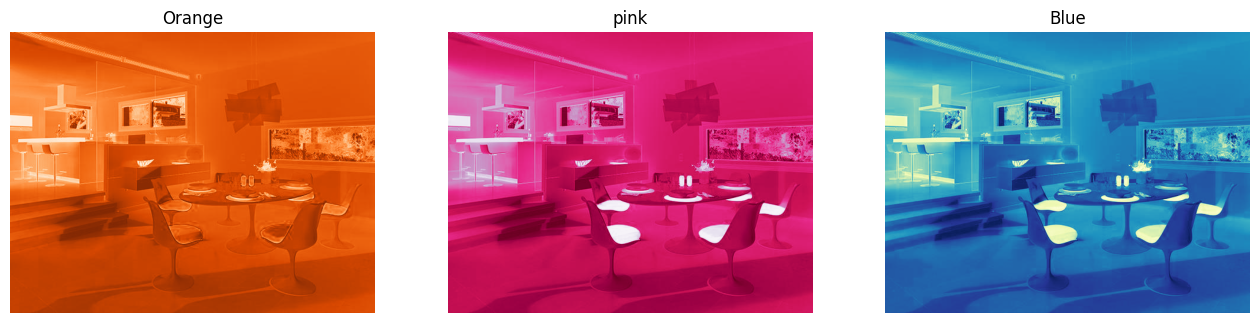

In [39]:
image = cv2.imread('images/sillas.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = image_rgb[:,:,0]
g = image_rgb[:,:,1]
b = image_rgb[:,:,2]

fig, axes = plt.subplots(1, 3 , figsize=(16,4))

axes[0].imshow(r, cmap = 'Oranges',)
axes[0].set_title('Orange')
axes[0].axis('off')

axes[1].imshow(g, cmap = 'PuRd')
axes[1].set_title('pink')
axes[1].axis('off')   

axes[2].imshow(b, cmap = 'YlGnBu')
axes[2].set_title('Blue')
axes[2].axis('off') 





plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

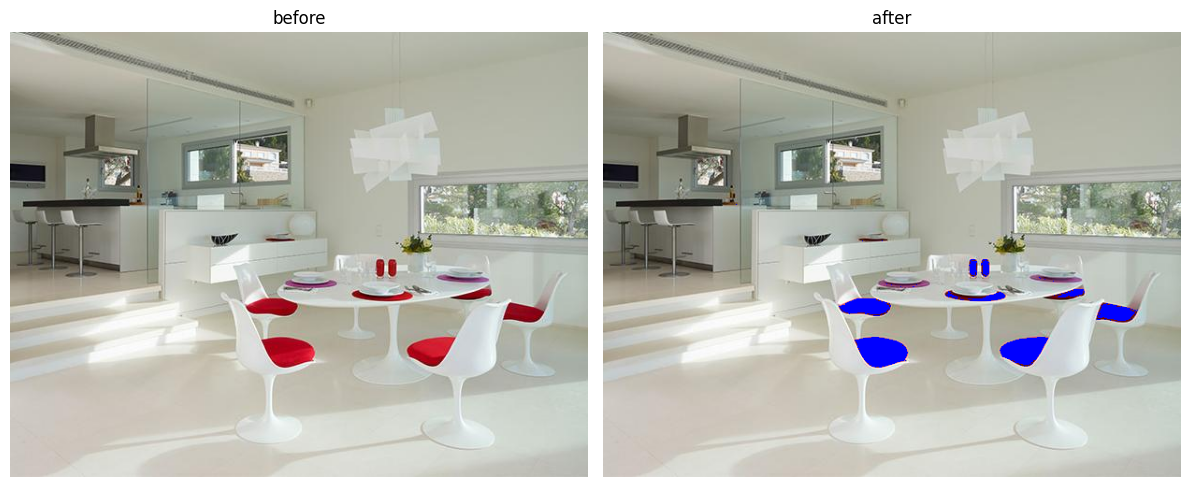

In [ ]:
modified_img_array = image_rgb.copy()

for x in range(image_rgb.shape[0]):
    for y in range(image_rgb.shape[1]):
        r, g, b = image_rgb[x, y]
        
        if r > 120 and g < 100 and b < 100:
            modified_img_array[x, y] = [0, 0, 255]  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('before')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('after')
plt.imshow(modified_img_array)
plt.axis('off')

plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

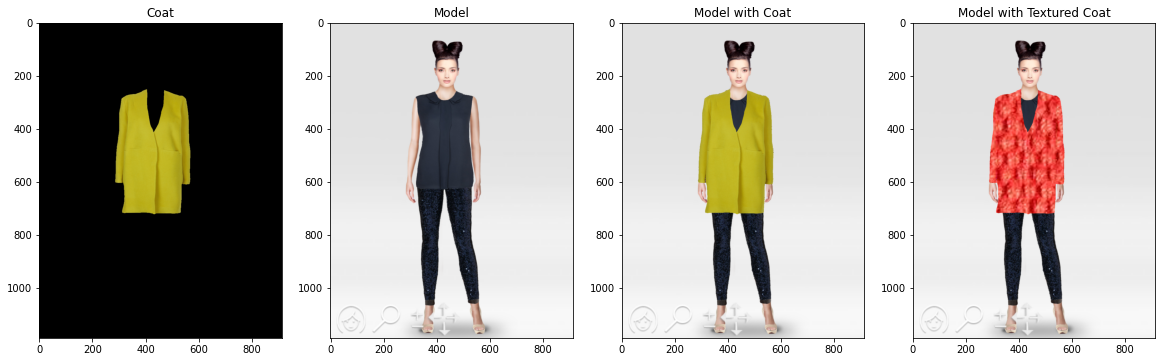

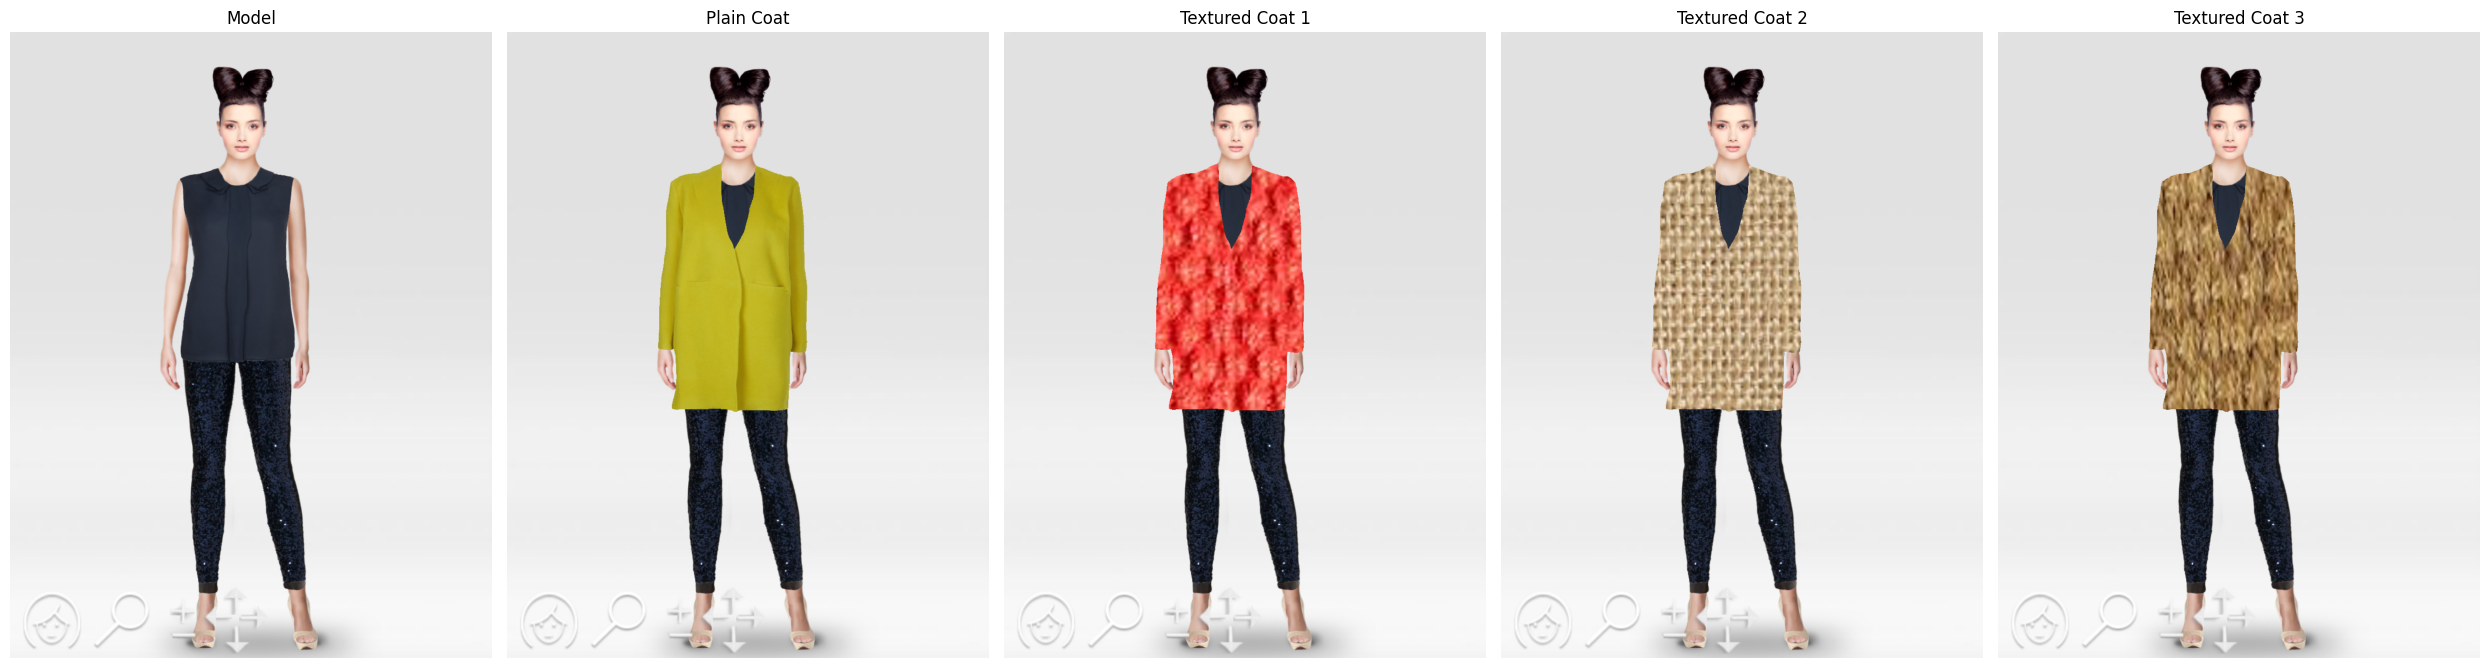

In [78]:

# Paths
model_path = 'images/model.png'
coat_path = 'images/coat.png'
texture1_path = 'images/texture2.png'
texture2_path = 'images/texture3.jpg'
texture3_path = 'images/texture.png'

# Load images
model = cv2.imread(model_path, cv2.IMREAD_UNCHANGED)
coat = cv2.imread(coat_path, cv2.IMREAD_UNCHANGED)
tex1 = cv2.imread(texture1_path, cv2.IMREAD_UNCHANGED)
tex2 = cv2.imread(texture2_path, cv2.IMREAD_UNCHANGED)
tex3 = cv2.imread(texture3_path, cv2.IMREAD_UNCHANGED)

# Convert images from BGR to RGB
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
tex1 = cv2.cvtColor(tex1, cv2.COLOR_BGR2RGB)
tex2 = cv2.cvtColor(tex2, cv2.COLOR_BGR2RGB)
tex3 = cv2.cvtColor(tex3, cv2.COLOR_BGR2RGB)

# Resize coat to match the model dimensions
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))

# Create mask from the coat image
gray = cv2.cvtColor(coat_resized, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Prepare the model background (area where the coat will be applied)
model_bg = cv2.bitwise_and(model, model, mask=cv2.bitwise_not(mask))
final_output_plain = cv2.add(model_bg, coat_resized)

# Resize textures to match the coat dimensions
tex1_resized = cv2.resize(tex1, (coat_resized.shape[1], coat_resized.shape[0]))
tex2_resized = cv2.resize(tex2, (coat_resized.shape[1], coat_resized.shape[0]))
tex3_resized = cv2.resize(tex3, (coat_resized.shape[1], coat_resized.shape[0]))

# Process texture 1
coat_texture1 = cv2.bitwise_and(tex1_resized, tex1_resized, mask=mask)
coat_bg1 = cv2.bitwise_and(coat_resized, coat_resized, mask=mask_inv)
textured_coat1 = cv2.add(coat_texture1, coat_bg1)
output_tex1 = cv2.add(model_bg, textured_coat1)

# Process texture 2
coat_texture2 = cv2.bitwise_and(tex2_resized, tex2_resized, mask=mask)
coat_bg2 = cv2.bitwise_and(coat_resized, coat_resized, mask=mask_inv)
textured_coat2 = cv2.add(coat_texture2, coat_bg2)
output_tex2 = cv2.add(model_bg, textured_coat2)

# Process texture 3
coat_texture3 = cv2.bitwise_and(tex3_resized, tex3_resized, mask=mask)
coat_bg3 = cv2.bitwise_and(coat_resized, coat_resized, mask=mask_inv)
textured_coat3 = cv2.add(coat_texture3, coat_bg3)
output_tex3 = cv2.add(model_bg, textured_coat3)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(25, 20))
axes[0].imshow(model)
axes[0].set_title("Model")
axes[0].axis('off')

axes[1].imshow(final_output_plain)
axes[1].set_title("Plain Coat")
axes[1].axis('off')

axes[2].imshow(output_tex1)
axes[2].set_title("Textured Coat 1")
axes[2].axis('off')

axes[3].imshow(output_tex2)
axes[3].set_title("Textured Coat 2")
axes[3].axis('off')

axes[4].imshow(output_tex3)
axes[4].set_title("Textured Coat 3")
axes[4].axis('off')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




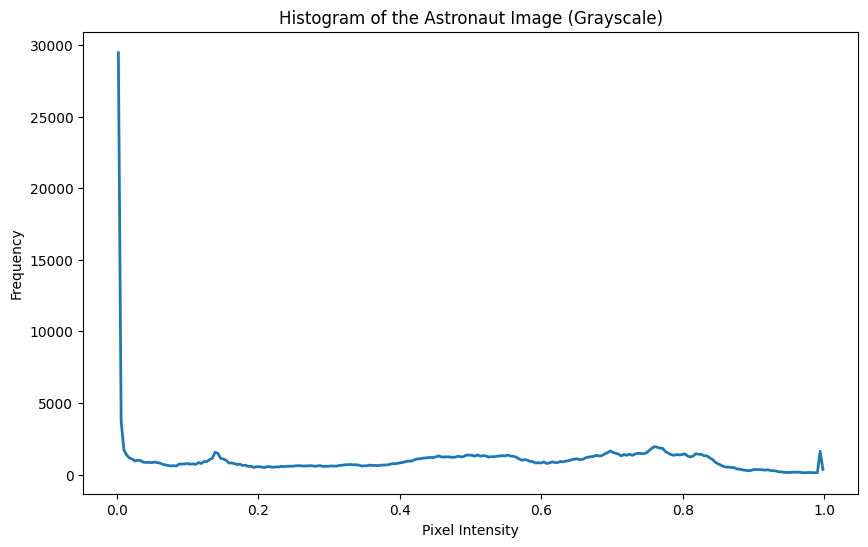

In [84]:

astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
hist, bin_centers = exposure.histogram(astronaut_gray)


plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, lw=2)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of the Astronaut Image (Grayscale)")
plt.show()




*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

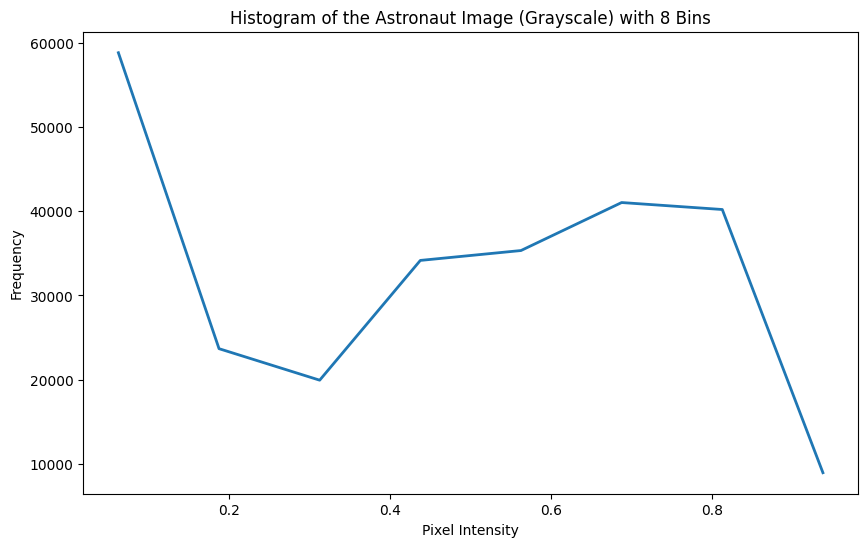

In [92]:
# solution

astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

hist, bin_centers = exposure.histogram(astronaut_gray, nbins=8)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, lw=2)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of the Astronaut Image (Grayscale) with 8 Bins")
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

### A low bin count oversimplifies the histogram by merging intensity levels and hiding details, while a very high bin count overemphasizes noise and small fluctuations.
### The optimal bin count balances detail with clarity and can be guided by statistical rules such as Sturges’ or the Freedman-Diaconis rule.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


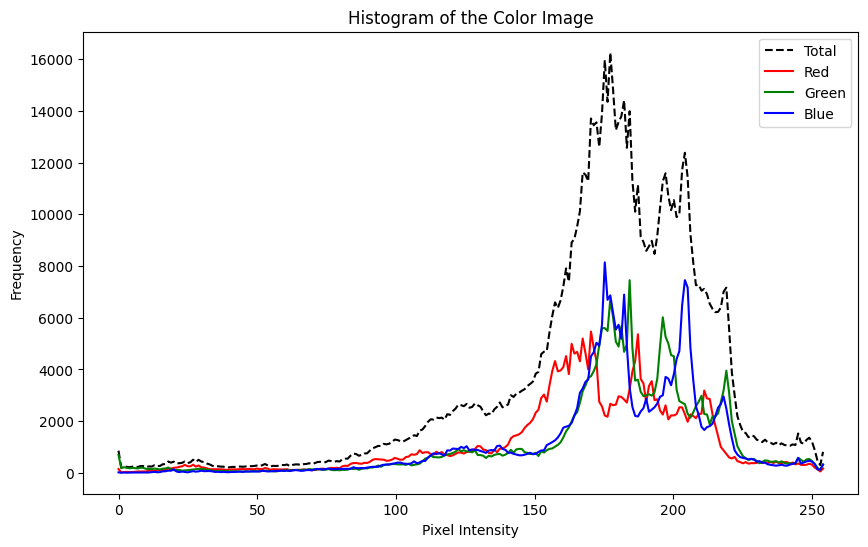

In [94]:
#solution

hist_r, bins_r = np.histogram(image[:, :, 0].ravel(), bins=256, range=[0, 255])
hist_g, bins_g = np.histogram(image[:, :, 1].ravel(), bins=256, range=[0, 255])
hist_b, bins_b = np.histogram(image[:, :, 2].ravel(), bins=256, range=[0, 255])

# Compute the total histogram (flatten all channels)
hist_total, bins_total = np.histogram(image.ravel(), bins=256, range=[0, 255])

# Plot all histograms in one plot with different legends
plt.figure(figsize=(10, 6))
plt.plot(bins_total[:-1], hist_total, label='Total', color='black', linestyle='--')
plt.plot(bins_r[:-1], hist_r, label='Red', color='red')
plt.plot(bins_g[:-1], hist_g, label='Green', color='green')
plt.plot(bins_b[:-1], hist_b, label='Blue', color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of the Color Image')
plt.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/Users/a7mad/Desktop/git_lab/tf_macos_env/lib/python3.10/site-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


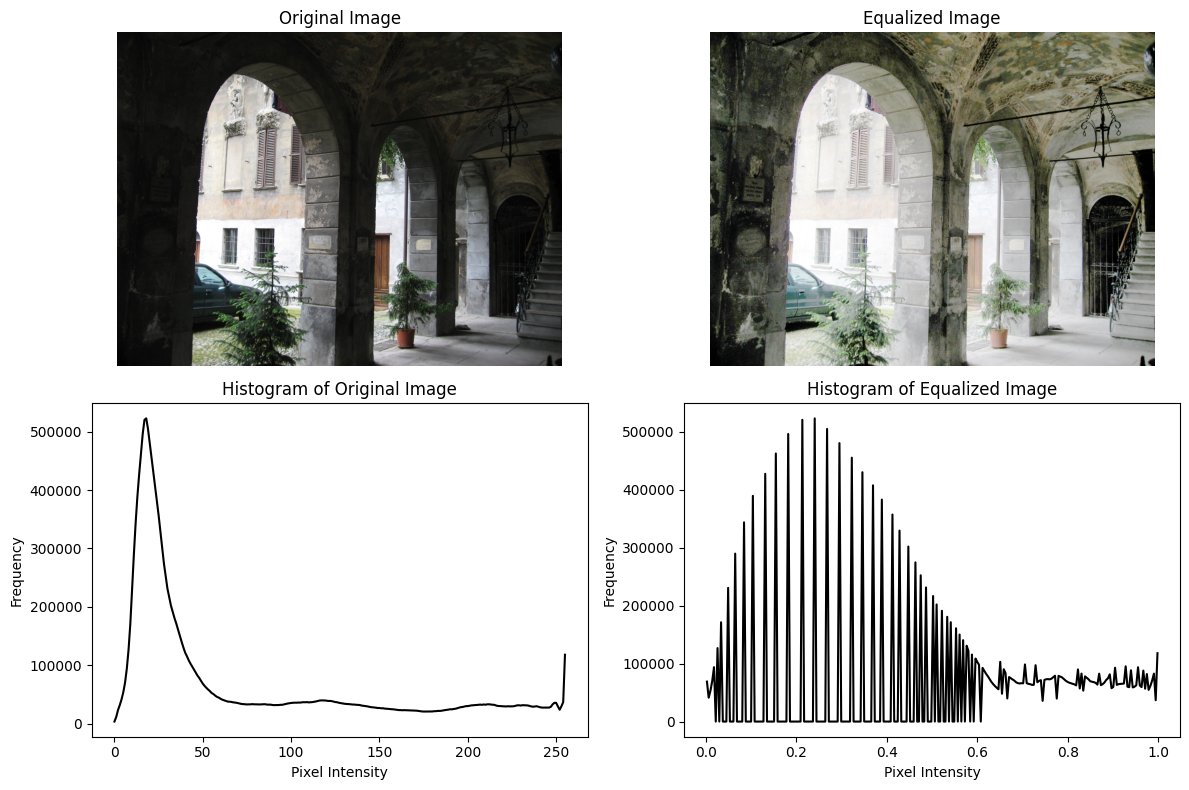

In [104]:
import matplotlib.pyplot as plt
from skimage import io, exposure, color


img = io.imread('images/aquatermi_lowcontrast.jpg')

hist_orig, bins_orig = exposure.histogram(img)
img_eq = exposure.equalize_hist(img)
hist_eq, bins_eq = exposure.histogram(img_eq)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')


axes[0, 1].imshow(img_eq, cmap='gray')
axes[0, 1].set_title("Equalized Image")
axes[0, 1].axis('off')


axes[1, 0].plot(bins_orig, hist_orig, color='black')
axes[1, 0].set_title("Histogram of Original Image")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Frequency")


axes[1, 1].plot(bins_eq, hist_eq, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



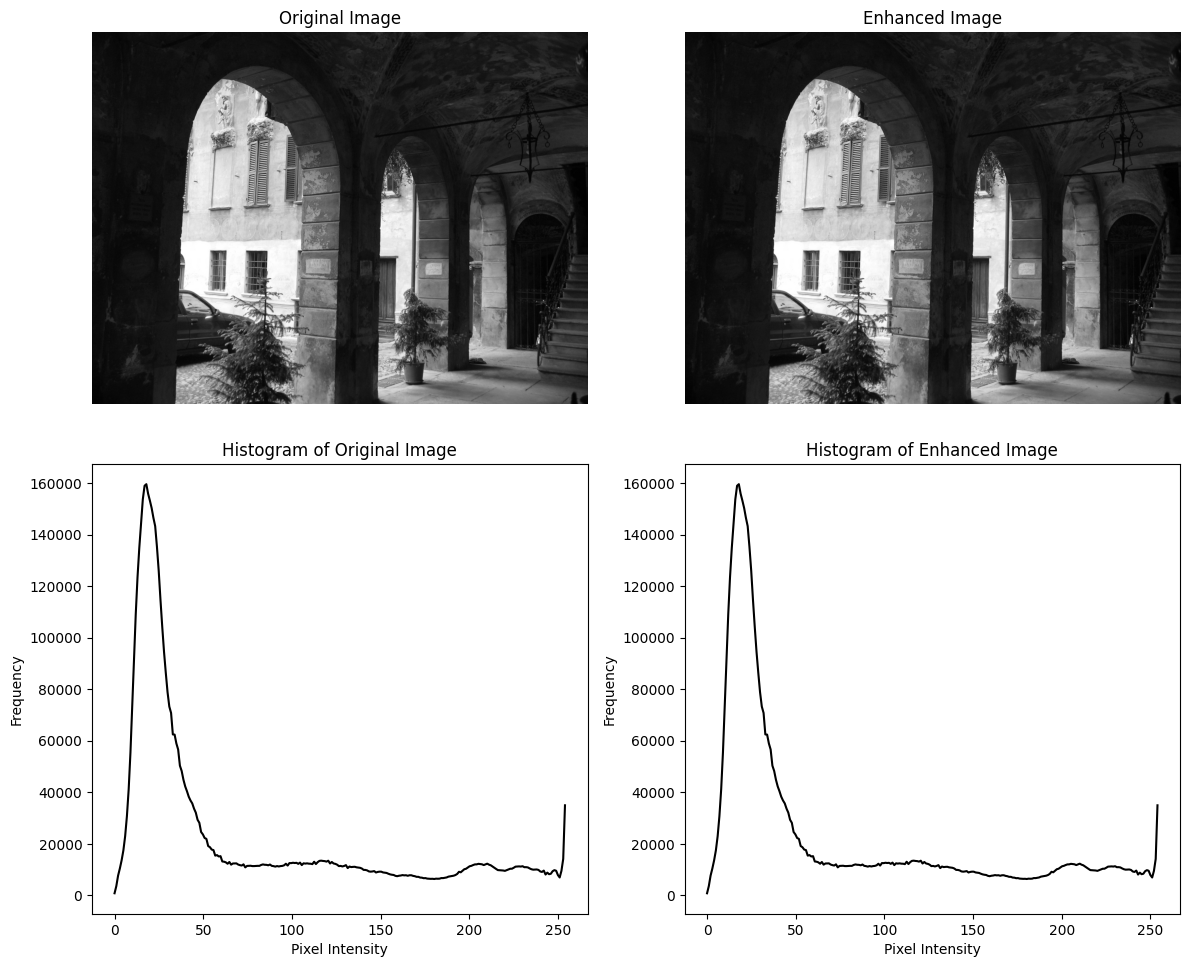

In [111]:
# solution


def linear_contrast_stretch(gray_img, bin_count):
    # Compute minimum and maximum intensity in the image
    I_min = gray_img.min()
    I_max = gray_img.max()
    # Avoid division by zero if image is flat
    if I_max == I_min:
        return gray_img.copy()
    # Apply linear contrast stretch transformation:
    # Map [I_min, I_max] to [0, 1] and then scale to 0-255 if needed.
    stretched = (gray_img - I_min) / (I_max - I_min)
    # If the image is of type uint8, scale to [0,255]
    if gray_img.dtype == np.uint8:
        stretched = (stretched * 255).astype(np.uint8)
    return stretched

# Read the low-contrast grayscale image
# Note: as_gray=True returns a floating point image in [0,1] by default.
img = io.imread('images/aquatermi_lowcontrast.jpg', as_gray=True)

# Optionally, if you prefer to work with uint8 images, you can scale it:
if img.max() <= 1:
    img_uint8 = (img * 255).astype(np.uint8)
else:
    img_uint8 = img

bin_count = 256  # Number of bins for the histogram

# Enhance the image using linear contrast stretch
enhanced_img = linear_contrast_stretch(img_uint8, bin_count)

# Compute histograms for original and enhanced images using the specified bin count
hist_orig, bins_orig = np.histogram(img_uint8.ravel(), bins=bin_count, range=[0, 255])
hist_enh, bins_enh = np.histogram(enhanced_img.ravel(), bins=bin_count, range=[0, 255])

# Plot the original image, its histogram, the enhanced image, and its histogram in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(img_uint8, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(enhanced_img, cmap='gray')
axes[0, 1].set_title("Enhanced Image")
axes[0, 1].axis('off')

axes[1, 0].plot(bins_orig[:-1], hist_orig, color='black')
axes[1, 0].set_title("Histogram of Original Image")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].plot(bins_enh[:-1], hist_enh, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




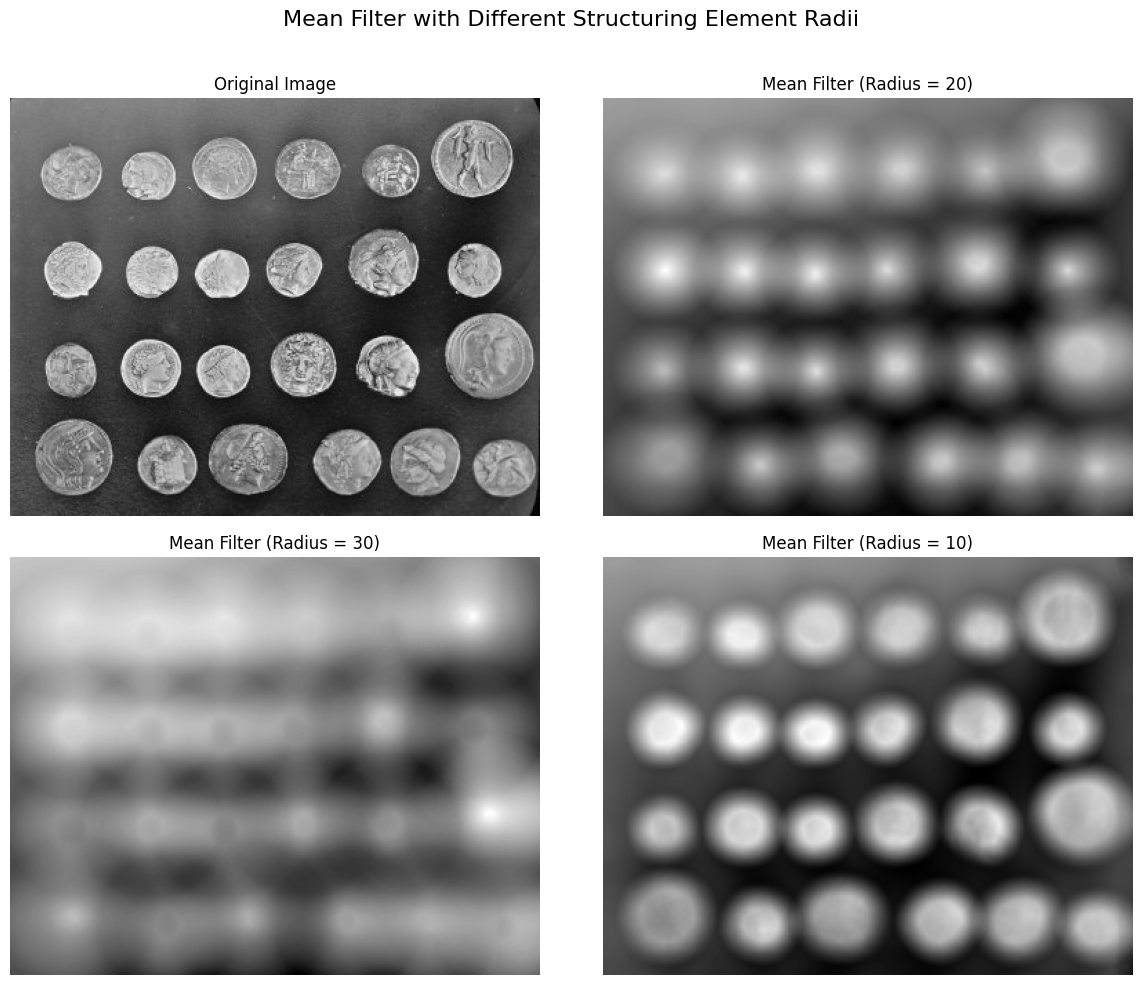

In [110]:
image = data.coins()

selem_20 = disk(20)
selem_30 = disk(30)
selem_10 = disk(10)


mean_filter_20 = rank.mean(image, selem_20)
mean_filter_30 = rank.mean(image, selem_30)
mean_filter_10 = rank.mean(image, selem_10)


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Mean Filter with Different Structuring Element Radii\n', fontsize=16)

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('\nOriginal Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(mean_filter_20, cmap='gray')
axs[0, 1].set_title('\nMean Filter (Radius = 20)')
axs[0, 1].axis('off')

axs[1, 0].imshow(mean_filter_30, cmap='gray')
axs[1, 0].set_title('\nMean Filter (Radius = 30)')
axs[1, 0].axis('off')

axs[1, 1].imshow(mean_filter_10, cmap='gray')
axs[1, 1].set_title('\nMean Filter (Radius = 10)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/var/folders/51/yn8s64cn1k9g94w1rvvfrc140000gn/T/ipykernel_20525/2720250120.py:6: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square (20x20)": square(20),
/var/folders/51/yn8s64cn1k9g94w1rvvfrc140000gn/T/ipykernel_20525/2720250120.py:7: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle (20x30)": rectangle(20, 30),


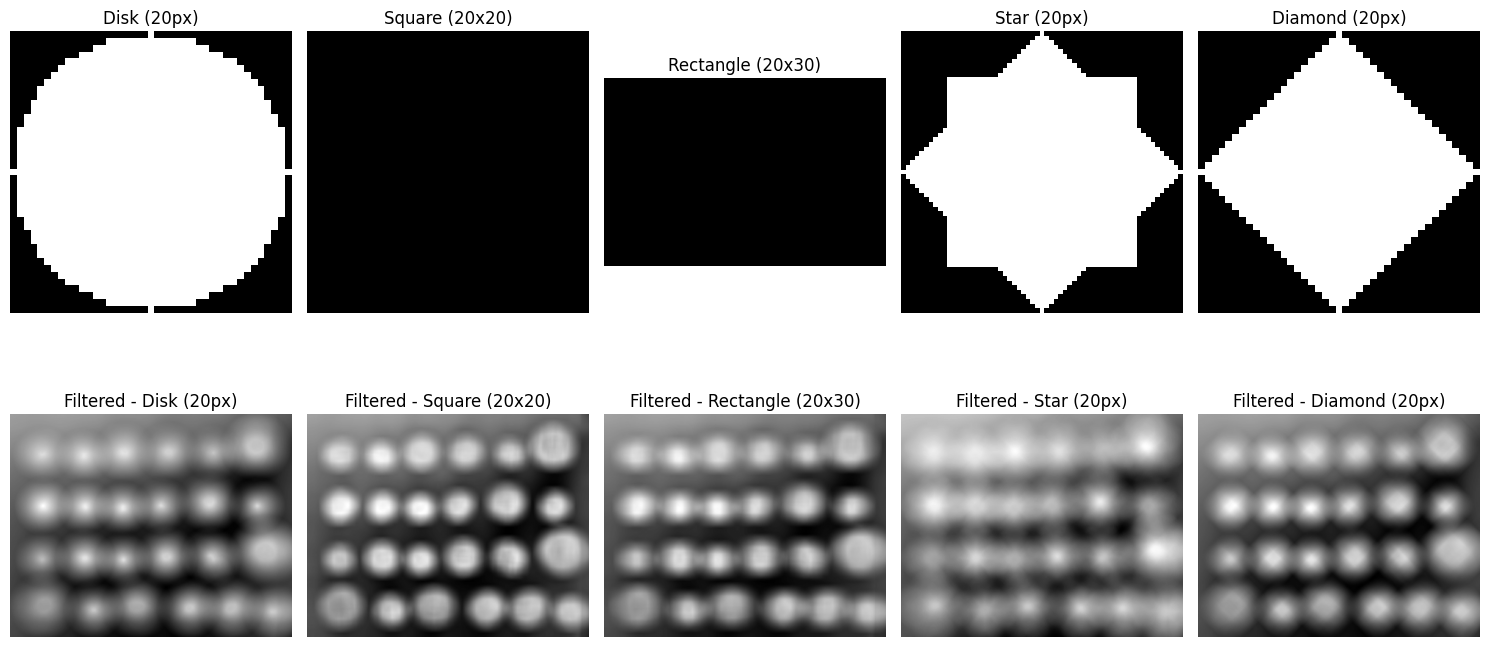

In [114]:

coins = data.coins()
coins = img_as_ubyte(coins)

selems = {
    "Disk (20px)": disk(20),
    "Square (20x20)": square(20),
    "Rectangle (20x30)": rectangle(20, 30),
    "Star (20px)": star(20),
    "Diamond (20px)": diamond(20)
}

filtered_images = {name: rank.mean(coins, footprint=selem) for name, selem in selems.items()}


fig, axes = plt.subplots(2, len(selems), figsize=(len(selems) * 3, 8))

for i, (name, selem) in enumerate(selems.items()):
   
    axes[0, i].imshow(selem, cmap="gray")
    axes[0, i].set_title(name)
    axes[0, i].axis("off")

    
    axes[1, i].imshow(filtered_images[name], cmap="gray")
    axes[1, i].set_title(f"Filtered - {name}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...